### > Install packages

In [24]:
%%sh
sudo apt-get update && sudo apt upgrade -y

sudo apt-get install ffmpeg -y

pip install -Uq diffusers==0.21.4

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [637 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1305 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.8 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1599 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1602 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1046 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports/main amd64 Packages [50.4 kB]

Reading package lists...
Building dependency tree...
Reading state information...
Calculating upgrade...
The following packages will be upgraded:
  apt base-files binutils binutils-common binutils-x86-64-linux-gnu
  cuda-keyring cuda-toolkit-config-common curl libapt-pkg6.0 libbinutils
  libc-bin libc-dev-bin libc6 libc6-dev libcap2 libctf-nobfd0 libctf0
  libcurl3-gnutls libcurl4 libgnutls30 libldap-2.5-0 libnghttp2-14 libperl5.34
  libprocps8 libpython3.10-minimal libpython3.10-stdlib libssh-4 libssl3
  libsystemd0 libudev1 linux-libc-dev openssl perl perl-base perl-modules-5.34
  procps python3.10 python3.10-minimal tar
39 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Need to get 34.8 MB of archives.
After this operation, 24.6 kB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  cuda-keyring 1.1-1 [4332 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  cuda-toolki

debconf: delaying package configuration, since apt-utils is not installed


Fetched 34.8 MB in 2s (22.7 MB/s)
(Reading database ... 23928 files and directories currently installed.)
Preparing to unpack .../libc6-dev_2.35-0ubuntu3.5_amd64.deb ...
Unpacking libc6-dev:amd64 (2.35-0ubuntu3.5) over (2.35-0ubuntu3.4) ...
Preparing to unpack .../libc-dev-bin_2.35-0ubuntu3.5_amd64.deb ...
Unpacking libc-dev-bin (2.35-0ubuntu3.5) over (2.35-0ubuntu3.4) ...
Preparing to unpack .../linux-libc-dev_5.15.0-91.101_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.15.0-91.101) over (5.15.0-88.98) ...
Preparing to unpack .../libc6_2.35-0ubuntu3.5_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78.)
debconf: falling back to frontend: Readline
Unpacking libc6:amd64 (2.35-0ubuntu3.5) over (2.35-0ubuntu3.4) ...
Setting up libc6:amd64 (2.35-0ubuntu3.5) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable 

debconf: delaying package configuration, since apt-utils is not installed


Fetched 143 MB in 6s (24.6 MB/s)
Selecting previously unselected package libapparmor1:amd64.
(Reading database ... 23926 files and directories currently installed.)
Preparing to unpack .../000-libapparmor1_3.0.4-2ubuntu2.3_amd64.deb ...
Unpacking libapparmor1:amd64 (3.0.4-2ubuntu2.3) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../001-libdbus-1-3_1.12.20-2ubuntu4.1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.12.20-2ubuntu4.1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../002-dbus_1.12.20-2ubuntu4.1_amd64.deb ...
Unpacking dbus (1.12.20-2ubuntu4.1) ...
Selecting previously unselected package libelf1:amd64.
Preparing to unpack .../003-libelf1_0.186-1build1_amd64.deb ...
Unpacking libelf1:amd64 (0.186-1build1) ...
Selecting previously unselected package libfribidi0:amd64.
Preparing to unpack .../004-libfribidi0_1.0.8-2ubuntu3.1_amd64.deb ...
Unpacking libfribidi0:amd64 (1.0.8-2ubuntu3.1) ...
Selecting previously unselecte

### > Setup

In [10]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch

device_count = torch.cuda.device_count()
assert device_count > 0, "No GPU devices detected."

print("Number of available GPU devices:", device_count)

device = torch.device("cuda:1")

Number of available GPU devices: 4


### > load text-to-image model

In [3]:
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to(device)

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

The config attributes {'feature_extractor': [None, None], 'image_encoder': [None, None]} were passed to StableDiffusionXLPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'feature_extractor': [None, None], 'image_encoder': [None, None]} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'reverse_transformer_layers_per_block': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.21.4",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs


  0%|          | 0/1 [00:00<?, ?it/s]

Size of the image: (512, 512)


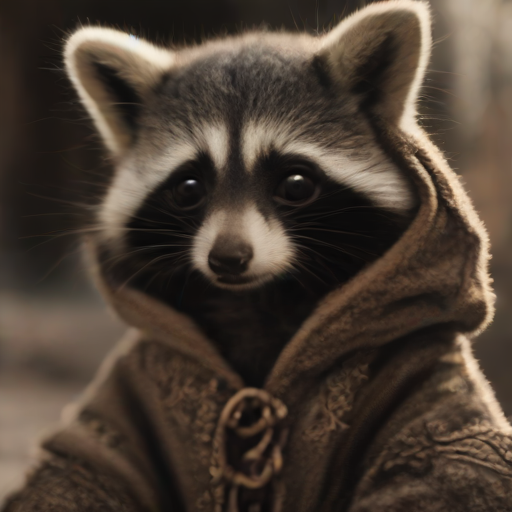

In [9]:
%time
prompt = "A cinematic shot of a baby racoon wearing an intricate italian priest robe."

image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]

print(f"Size of the image: {image.size}")
image

### > load image-to-image model

In [11]:
image_pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
image_pipe.to(device)

The config attributes {'feature_extractor': [None, None], 'image_encoder': [None, None]} were passed to StableDiffusionXLImg2ImgPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'feature_extractor': [None, None], 'image_encoder': [None, None]} are not expected by StableDiffusionXLImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'reverse_transformer_layers_per_block': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


StableDiffusionXLImg2ImgPipeline {
  "_class_name": "StableDiffusionXLImg2ImgPipeline",
  "_diffusers_version": "0.21.4",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "force_zeros_for_empty_prompt": true,
  "requires_aesthetics_score": false,
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

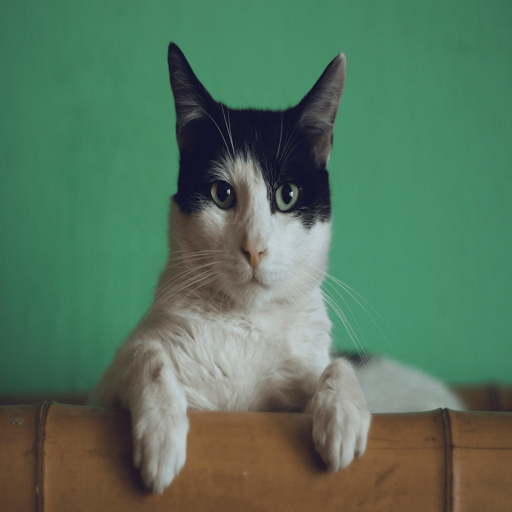

In [12]:
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png").resize((512, 512))
init_image

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.44 µs


  0%|          | 0/1 [00:00<?, ?it/s]

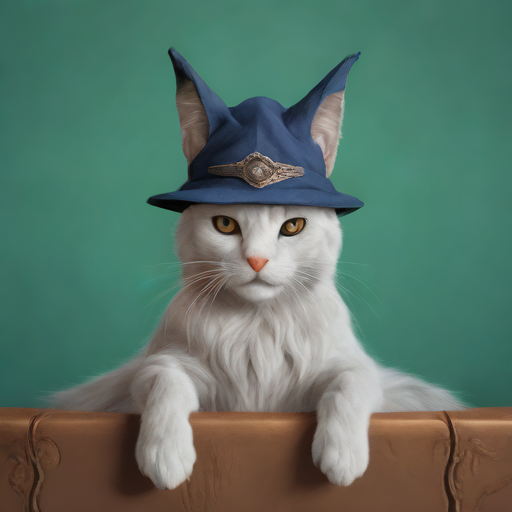

In [15]:
%time
prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"

image = image_pipe(prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0).images[0]
image

### > Self test

In [18]:
from PIL import Image
def center_crop_and_resize(image_path, new_size):
    # Open the image
    image = Image.open(image_path)

    # Calculate the coordinates for center cropping
    width, height = image.size
    left = (width - min(width, height)) // 2
    top = (height - min(width, height)) // 2
    right = (width + min(width, height)) // 2
    bottom = (height + min(width, height)) // 2

    # Perform center cropping
    image = image.crop((left, top, right, bottom))

    # Resize the image to the new size
    image = image.resize(new_size)

    return image

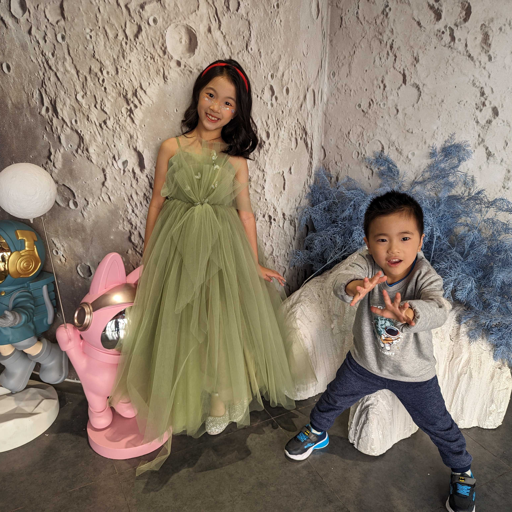

In [19]:
image_path = "sample_01.jpg"
new_size = (512, 512)
result_image = center_crop_and_resize(image_path, new_size)
result_image

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


  0%|          | 0/1 [00:00<?, ?it/s]

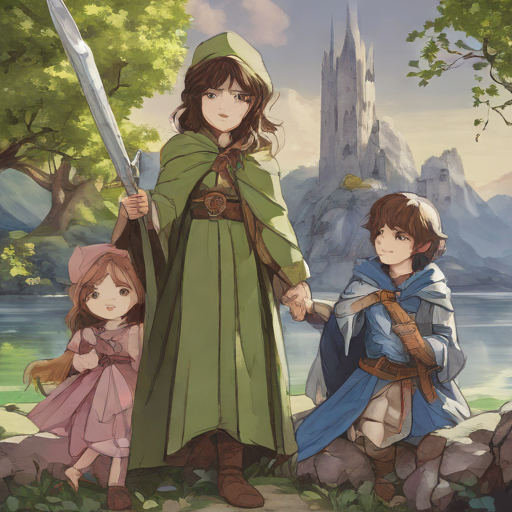

In [21]:
%time
prompt = "girl wizard and boy knight, lord of the rings, detailed, fantasy, cute, adorable, anime, cartoon 8k"

image = image_pipe(prompt, image=result_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0).images[0]
image

### > Download sample video

In [22]:
CDN_URL = "https://d2yqlwoly7fl0b.cloudfront.net/super-slomo"

SAMPLE_VIDEO = "westiepoo.mov"
!wget -L {CDN_URL}/samples/{SAMPLE_VIDEO} -O {SAMPLE_VIDEO}

--2023-12-31 10:37:28--  https://d2yqlwoly7fl0b.cloudfront.net/super-slomo/samples/westiepoo.mov
Resolving d2yqlwoly7fl0b.cloudfront.net (d2yqlwoly7fl0b.cloudfront.net)... 18.161.3.70, 18.161.3.85, 18.161.3.7, ...
Connecting to d2yqlwoly7fl0b.cloudfront.net (d2yqlwoly7fl0b.cloudfront.net)|18.161.3.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8908629 (8.5M) [video/quicktime]
Saving to: ‘westiepoo.mov’

westiepoo.mov       100%[===================>]   8.50M  17.6MB/s    in 0.5s    

2023-12-31 10:37:29 (17.6 MB/s) - ‘westiepoo.mov’ saved [8908629/8908629]



### > preview video

In [28]:
from IPython.display import Video, Image, display

Video(SAMPLE_VIDEO, width=640, height=360)

Extract frames

In [26]:
import helper

frame_dir = helper.extract_frames(SAMPLE_VIDEO)

!ls {frame_dir}

/tmp/612553/frame-%07d.jpg


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

frame-0000001.jpg  frame-0000026.jpg  frame-0000051.jpg  frame-0000076.jpg
frame-0000002.jpg  frame-0000027.jpg  frame-0000052.jpg  frame-0000077.jpg
frame-0000003.jpg  frame-0000028.jpg  frame-0000053.jpg  frame-0000078.jpg
frame-0000004.jpg  frame-0000029.jpg  frame-0000054.jpg  frame-0000079.jpg
frame-0000005.jpg  frame-0000030.jpg  frame-0000055.jpg  frame-0000080.jpg
frame-0000006.jpg  frame-0000031.jpg  frame-0000056.jpg  frame-0000081.jpg
frame-0000007.jpg  frame-0000032.jpg  frame-0000057.jpg  frame-0000082.jpg
frame-0000008.jpg  frame-0000033.jpg  frame-0000058.jpg  frame-0000083.jpg
frame-0000009.jpg  frame-0000034.jpg  frame-0000059.jpg  frame-0000084.jpg
frame-0000010.jpg  frame-0000035.jpg  frame-0000060.jpg  frame-0000085.jpg
frame-0000011.jpg  frame-0000036.jpg  frame-0000061.jpg  frame-0000086.jpg
frame-0000012.jpg  frame-0000037.jpg  frame-0000062.jpg  frame-0000087.jpg
frame-0000013.jpg  frame-0000038.jpg  frame-0000063.jpg  frame-0000088.jpg
frame-0000014.jpg  frame-

frame=  100 fps=0.0 q=1.0 Lsize=N/A time=00:00:04.00 bitrate=N/A speed=6.52x    
video:28423kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


### > Preview a random frame

(1920, 1080)


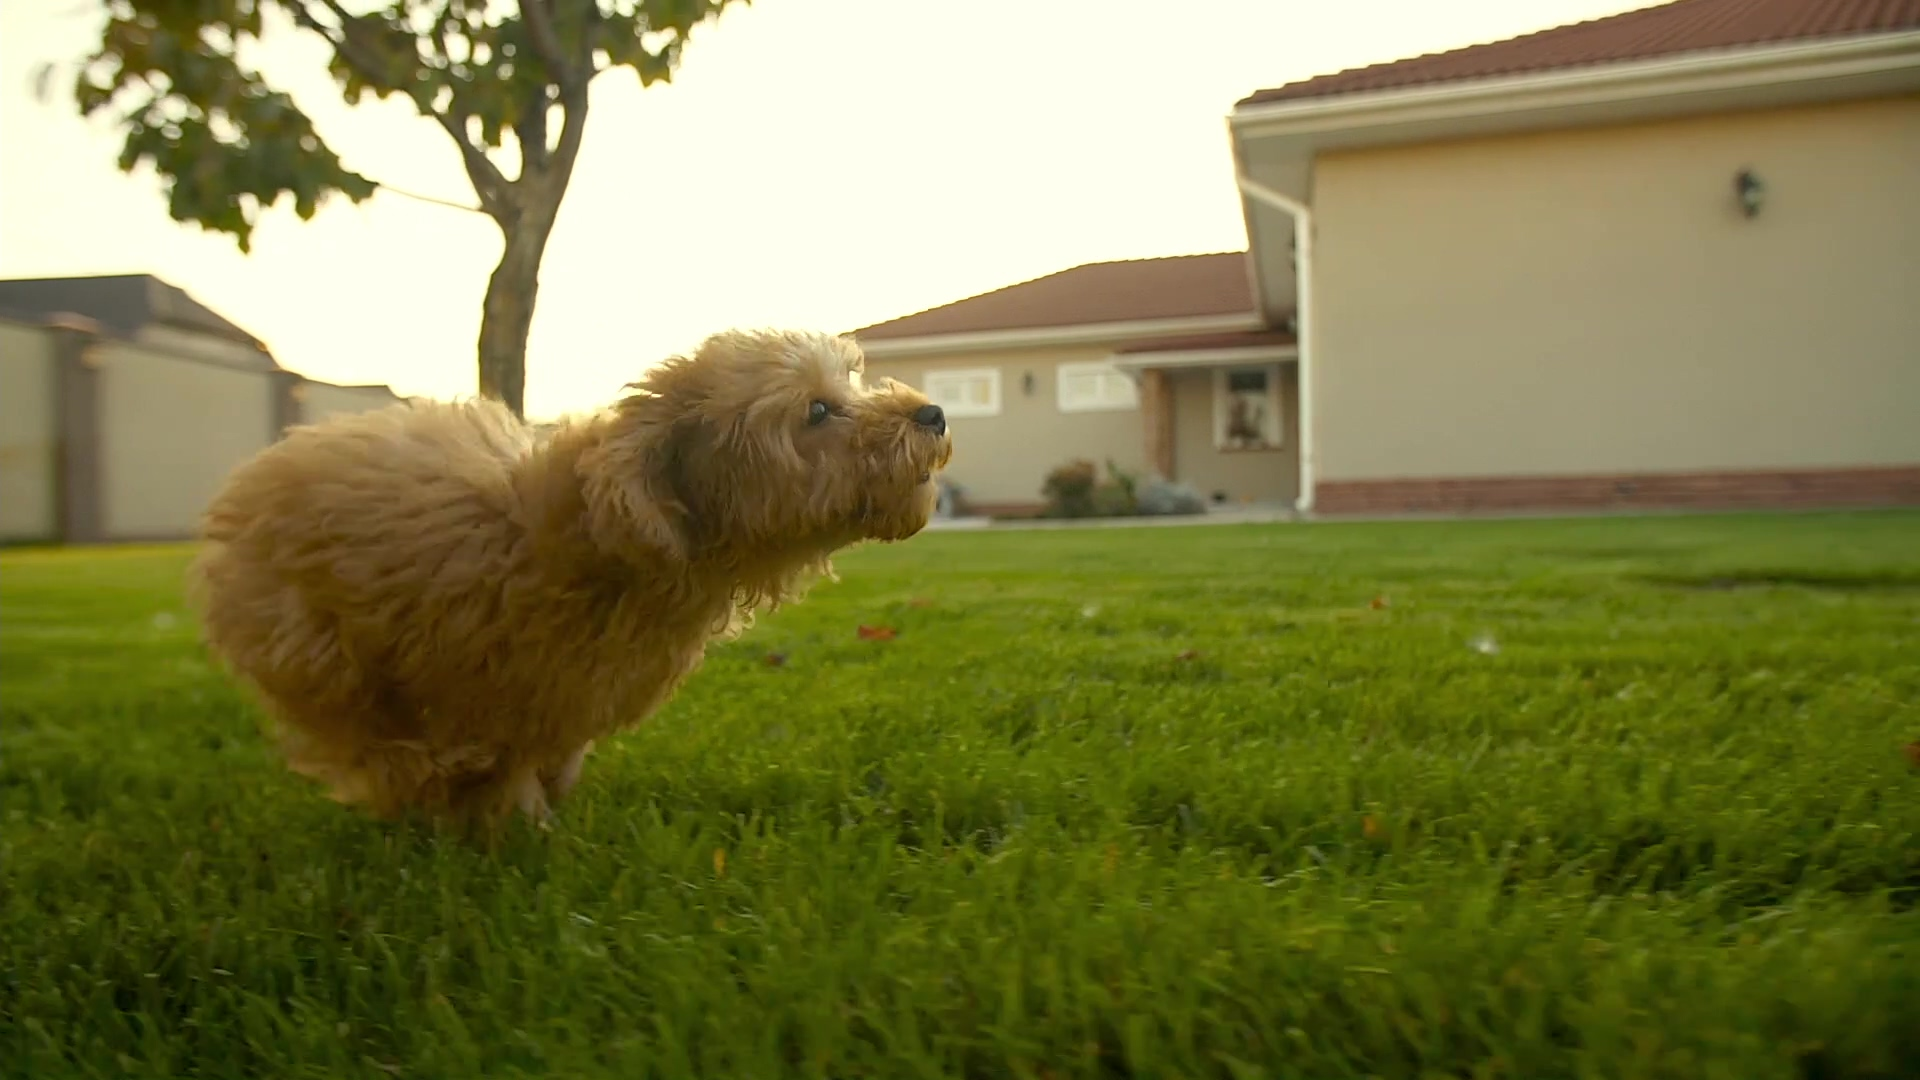

In [36]:
import os
import random
from PIL import Image

def preview_random_image(folder_path):
    # Get the list of image files in the folder
    image_files = [file for file in os.listdir(folder_path) if file.endswith((".jpg", ".jpeg", ".png"))]
    
    # Select a random image file
    random_image_file = random.choice(image_files)

    # Open the image
    image_path = os.path.join(folder_path, random_image_file)

    image = Image.open(image_path)

    print(image.size)

    # Display the image
    display(image)
    return image

init_image = preview_random_image(frame_dir)

In [38]:
from PIL import Image

def scale_image(image, width=None, height=None):
    # Get the original size of the image
    original_width, original_height = image.size

    # Calculate the scaling factors for width and height
    width_scale = width / original_width if width else height / original_height
    height_scale = height / original_height if height else width / original_width

    # Determine the final size based on the scaling factors
    new_width = int(original_width * width_scale)
    new_height = int(original_height * height_scale)

    # Scale the image to the new size
    scaled_image = image.resize((new_width, new_height))

    return scaled_image

In [50]:
original_h = init_image.size[1]

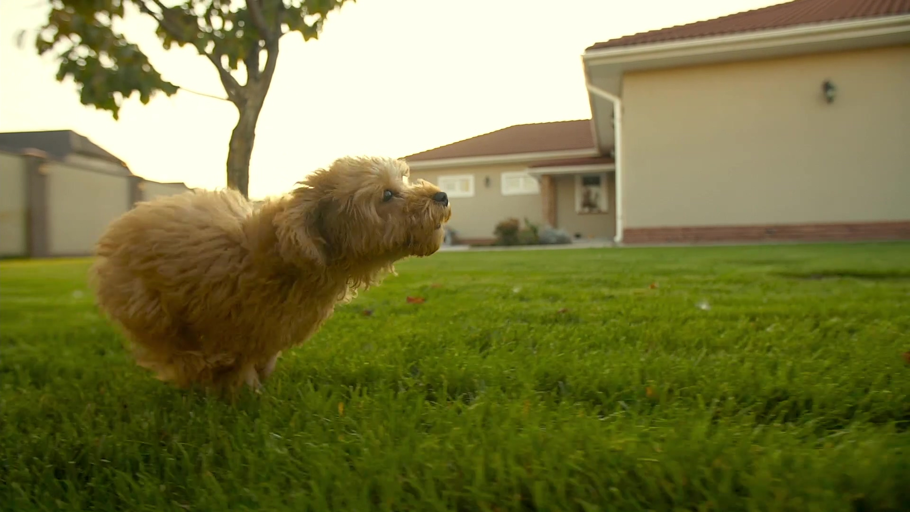

In [49]:
scaled_image = scale_image(init_image, height=512)
scaled_image

In [53]:
scaled_back_image = scale_image(scaled_image, height=original_h)
scaled_back_image.size

(1919, 1080)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


  0%|          | 0/1 [00:00<?, ?it/s]

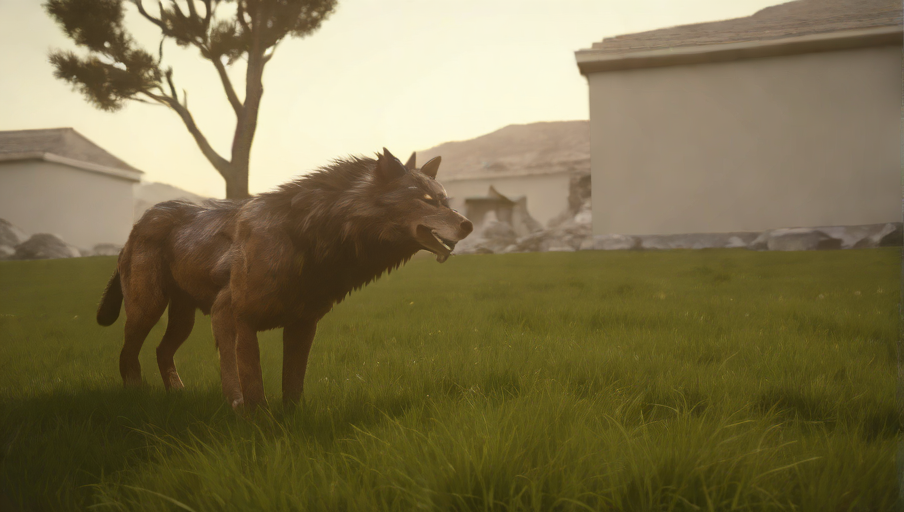

In [44]:
%time
prompt = "fierce transformer wolf, muscular, dark night, in the mountains, 3d, 8k"

image = image_pipe(prompt, image=scaled_image, num_inference_steps=2, strength=.7, guidance_scale=0.0).images[0]
image

### > Process the frames

In [46]:
from pathlib import Path
    
output_dir = Path(f"/tmp/{random.randint(0, 1000000)}")
while output_dir.exists():
    output_dir = Path(f"/tmp/{random.randint(0, 1000000)}")
    
output_dir.mkdir(parents=True, exist_ok=False)

In [54]:
# Get the list of image files in the input folder
image_files = [file for file in os.listdir(frame_dir) if file.endswith((".jpg", ".jpeg", ".png"))]

# Process each image file
for image_file in image_files:
    # Load the image
    image_path = os.path.join(frame_dir, image_file)
    image = Image.open(image_path)

    original_height = image.size[1]

    # scale images down
    scaled_down_image = scale_image(init_image, height=512)

    # process the image
    new_image = image_pipe(prompt, image=scaled_down_image, num_inference_steps=2, strength=.7, guidance_scale=0.0).images[0]
    
    scaled_back_image = scale_image(new_image, height=original_height)

    output_path = os.path.join(output_dir, image_file)
    scaled_back_image.save(output_path)

    print(f"Processed image saved: {output_path}")

  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000001.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000002.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000003.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000004.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000005.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000006.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000007.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000008.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000009.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000010.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000011.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000012.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000013.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000014.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000015.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000016.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000017.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000018.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000019.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000020.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000021.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000022.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000023.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000024.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000025.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000026.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000027.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000028.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000029.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000030.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000031.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000032.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000033.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000034.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000035.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000036.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000037.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000038.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000039.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000040.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000041.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000042.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000043.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000044.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000045.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000046.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000047.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000048.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000049.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000050.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000051.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000052.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000053.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000054.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000055.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000056.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000057.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000058.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000059.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000060.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000061.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000062.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000063.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000064.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000065.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000066.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000067.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000068.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000069.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000070.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000071.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000072.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000073.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000074.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000075.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000076.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000077.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000078.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000079.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000080.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000081.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000082.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000083.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000084.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000085.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000086.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000087.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000088.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000089.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000090.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000091.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000092.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000093.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000094.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000095.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000096.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000097.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000098.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000099.jpg


  0%|          | 0/1 [00:00<?, ?it/s]

Processed image saved: /tmp/733816/frame-0000100.jpg


### > Recreate the video

In [57]:
import time
ouput_video = "output.mp4"

helper.create_video(output_dir, #slow-mo frames
                    ouput_video,   #generated video
                    fr=25)         #frame rate of the video
 
time.sleep(5)

Video(ouput_video, width=640, height=360)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab